<a href="https://colab.research.google.com/github/Pranit07G/PG-AlmaBetter-EDA-AirBNB-NYC/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/EDA/Airbnb/Airbnb NYC 2019.csv'

bnb_nyc = pd.read_csv(path)

In [4]:
bnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
bnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From above, we can easily identify that the columns "price" and "minimum_nights" may be having outliers. Removing these columns may have an impact on the overall data. But, price cannot be 0. So, we remove the rows where price for  listing is 0. We classify the data into sub categories or bins for the 'prices', 'availability', 'minimum_nights' and 'calculated_host_listings_count' columns. As for the number_of_reviews and calculated host_listings_count columns, the data corresponds to the response recieved from the customers in general and the number of listings for a particular host, hence we cannot classify outlier data for these two columns.

In [6]:
bnb_nyc = bnb_nyc[bnb_nyc["price"] > 0]

In [7]:
#The prices, availability, minimum_nights and calculated_host_listings_count
# are binned into different levels, this is purely for the purpose of visualisation 

bnb_nyc["Price Range"] = pd.cut(bnb_nyc["price"], [-1, 100, 200, 600, 12000], labels=["≤ 100", "100 - 200", "200-600", ">600"])
bnb_nyc["Minimum Nights"] = pd.cut(bnb_nyc["minimum_nights"], [-1, 5, 50, 100, 375, 1250], labels=["≤ 5", "5-50", "50-100", "100-365", ">365"])
bnb_nyc["Availability"] = pd.cut(bnb_nyc["availability_365"], [-1, 90, 180, 270, 365], labels=["≤ 90", "90 - 180", "180-270", "270+"])
bnb_nyc["Host Listings"] = pd.cut(bnb_nyc["calculated_host_listings_count"], [-1, 5, 50, 100, 400], labels=["≤ 5", "5-50", "50-100", ">100"])


In [8]:
bnb_nyc.describe(include=['object','category'])


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,Price Range,Minimum Nights,Availability,Host Listings
count,48868,48863,48884,48884,48884,38833,48884,48884,48884,48884
unique,47894,11450,5,221,3,1764,4,5,4,4
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23,≤ 100,≤ 5,≤ 90,≤ 5
freq,18,417,21660,3919,25407,1412,23917,38743,29241,44093


In [9]:
# Get an overview of the contents of each column.
bnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48884 non-null  int64   
 1   name                            48868 non-null  object  
 2   host_id                         48884 non-null  int64   
 3   host_name                       48863 non-null  object  
 4   neighbourhood_group             48884 non-null  object  
 5   neighbourhood                   48884 non-null  object  
 6   latitude                        48884 non-null  float64 
 7   longitude                       48884 non-null  float64 
 8   room_type                       48884 non-null  object  
 9   price                           48884 non-null  int64   
 10  minimum_nights                  48884 non-null  int64   
 11  number_of_reviews               48884 non-null  int64   
 12  last_review       

In [10]:
# Check the no of null values in each column
bnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
Price Range                           0
Minimum Nights                        0
Availability                          0
Host Listings                         0
dtype: int64

In [11]:
# Replace null values in last_review column by NaN 
bnb_nyc["last_review"].fillna('NaN', inplace = True)
# Replace null values in reviews_per_month by 0 
bnb_nyc["reviews_per_month"].fillna(0, inplace = True)

In [12]:
bnb_nyc.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
Price Range                        0
Minimum Nights                     0
Availability                       0
Host Listings                      0
dtype: int64

In [13]:
bnb_nyc.nunique(axis = 0)

id                                48884
name                              47894
host_id                           37455
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19046
longitude                         14715
room_type                             3
price                               673
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
Price Range                           4
Minimum Nights                        5
Availability                          4
Host Listings                         4
dtype: int64

It can be seen that the 'id' column can be considered as a unique identifier for the data. Also, 'host_id' uniquely identifies the hosts while the 'host_name' contains duplicate value and even null values. Hence, we can drop the column 'name' and 'host_name' from the above dataset to clean the data. 

In [14]:
bnb_nyc.drop(["name","host_name"], axis = 1, inplace = True)
# bnb_nyc_wo.drop(["name","host_name"], axis = 1, inplace = True)

In [15]:
bnb_nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Minimum Nights,Availability,Host Listings
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,100 - 200,≤ 5,270+,5-50
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200-600,≤ 5,270+,≤ 5
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,100 - 200,≤ 5,270+,≤ 5
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,≤ 100,≤ 5,180-270,≤ 5
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,≤ 100,5-50,≤ 90,≤ 5


In [16]:
bnb_nyc.tail()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Minimum Nights,Availability,Host Listings
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.0,2,9,≤ 100,≤ 5,≤ 90,≤ 5
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.0,2,36,≤ 100,≤ 5,≤ 90,≤ 5
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.0,1,27,100 - 200,5-50,≤ 90,≤ 5
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.0,6,2,≤ 100,≤ 5,≤ 90,5-50
48894,36487245,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,0.0,1,23,≤ 100,5-50,≤ 90,≤ 5


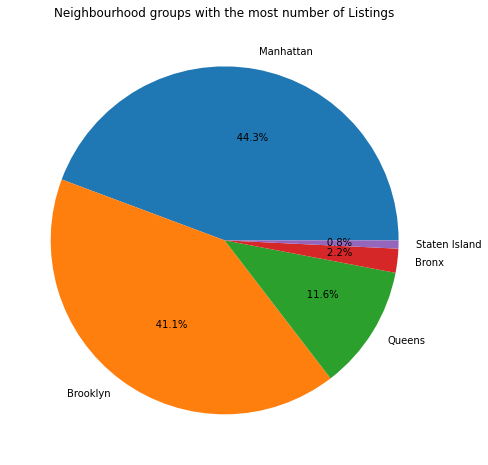

In [17]:
#Neighbourhood groups with the most number of listings

labels = bnb_nyc["neighbourhood_group"].value_counts().index
sizes = bnb_nyc["neighbourhood_group"].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%10.1f%%')
plt.title("Neighbourhood groups with the most number of Listings", color = 'black',fontsize = 12);


It can be seen from the above pie chart that the Neighbourhood Manhattan has the most no. of listings(44.3%) which is closely followed by Brookly(41.1%)

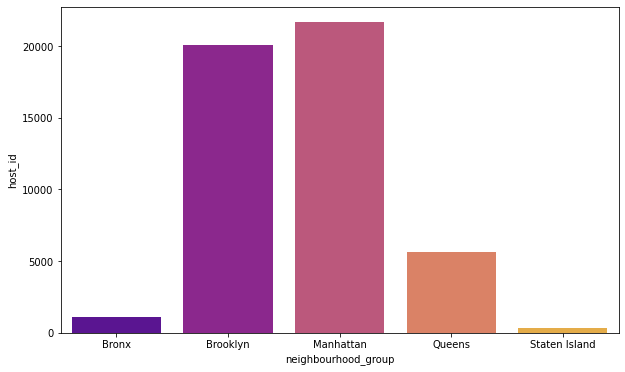

In [18]:
#Count of Host ID's distributed across Neighbourhood Group

neighbourhood_prices = bnb_nyc.groupby("neighbourhood_group")["host_id"].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=neighbourhood_prices, x=neighbourhood_prices["neighbourhood_group"], y=neighbourhood_prices["host_id"], palette='plasma');

It can be observed that Manhattan and Brooklyn have more than 20000 listings, making them the most popular Neighbourhoods for AirBnB listings.

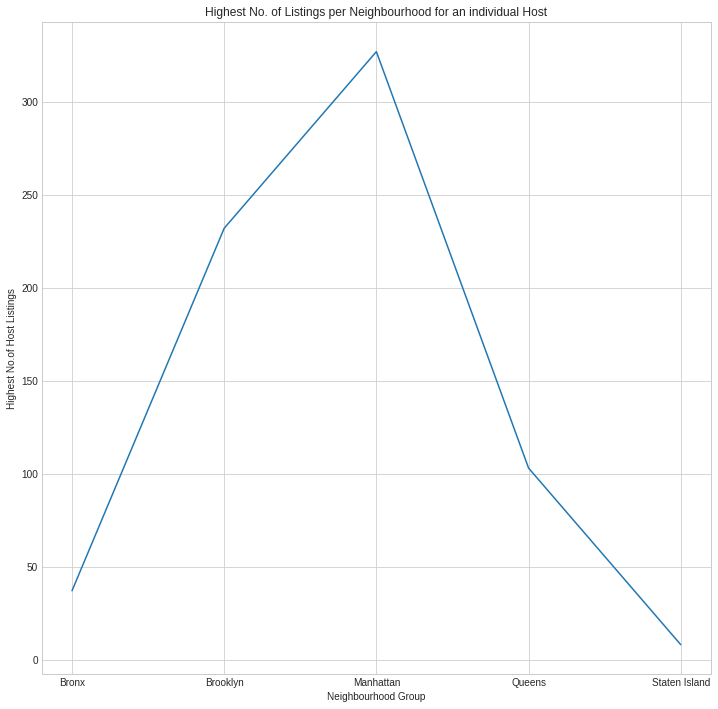

In [20]:
# To determne the Highest No. of Listings per Neighbourhood for an individual Host

nlmax_count = bnb_nyc.groupby("neighbourhood_group")["calculated_host_listings_count"].max().reset_index()
plt.figure(figsize = (12,12))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
x = nlmax_count["neighbourhood_group"]
y = nlmax_count["calculated_host_listings_count"]
plt.xlabel("Neighbourhood Group")
plt.ylabel("Highest No.of Host Listings")
plt.title("Highest No. of Listings per Neighbourhood for an individual Host")
ax.plot(x , y)
plt.show()



Manhattan has the Highest No of listings for an individual host at 300+, which is followed by Brooklyn (between 200 and 250)

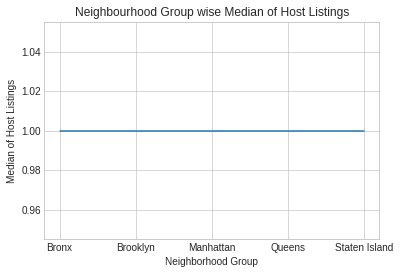

In [22]:
# To find the Neighbourhood Group wise Median of Host Listings

nlmedian_count = bnb_nyc.groupby("neighbourhood_group")["calculated_host_listings_count"].median().reset_index()
plt.style.use('seaborn-whitegrid')
ax1 = plt.axes()
x = nlmedian_count["neighbourhood_group"]
y = nlmedian_count["calculated_host_listings_count"]
plt.xlabel("Neighborhood Group")
plt.ylabel("Median of Host Listings")
plt.title("Neighbourhood Group wise Median of Host Listings")
ax1.plot(x , y)
plt.show()

All the Neighborhood Groups have a median of 1 listing per host

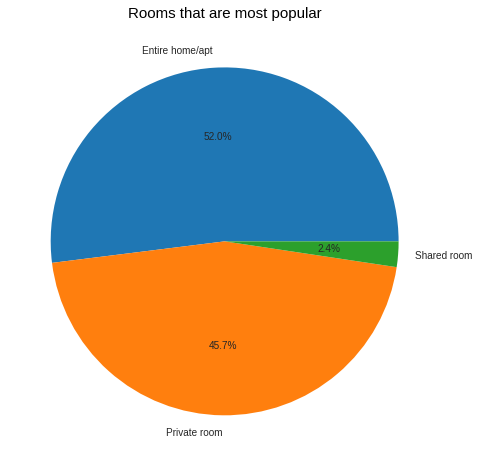

In [25]:
#The rooms that are the most popular
labels = bnb_nyc['room_type'].value_counts().index
sizes = bnb_nyc['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Rooms that are most popular", color = 'black',fontsize = 15);

From the above Pie Chart, it is clearly visible that the the most popular room types are Entire home/apt and Private Room with only 2.4% of the rooms being a shred room type 

Text(0, 0.5, 'Availability')

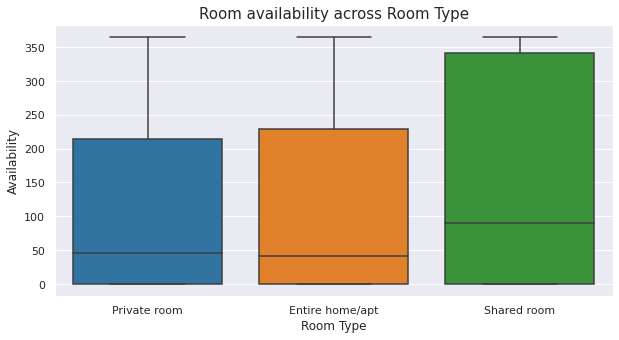

In [30]:

# Room availability across Room Type
plt.figure(figsize=(10,5))
sns.boxplot(data=bnb_nyc, x='room_type',y='availability_365',palette='tab10')
plt.title("Room availability across Room Type",size=15)
plt.xlabel("Room Type")
plt.ylabel("Availability")



It can be observed that the availability for the Private room and Entire Home/apt is the lowest, which establishes our earlier finding of these rooms being the most popular. 

Text(0.5, 1.0, 'Room type wise Median Price')

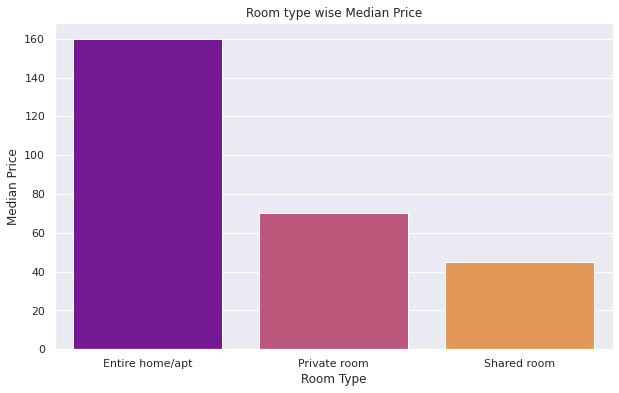

In [44]:
# #Median price for room type

room_type_mean_price = bnb_nyc.groupby('room_type')['price'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=room_type_mean_price, x=room_type_mean_price['room_type'], y=room_type_mean_price['price'], palette='plasma');
plt.xlabel("Room Type")
plt.ylabel("Median Price")
plt.title("Room type wise Median Price")

It can be observed from the above bar plot that the Entire home/apt has the highest median price while the shared room has the cheapest median price.

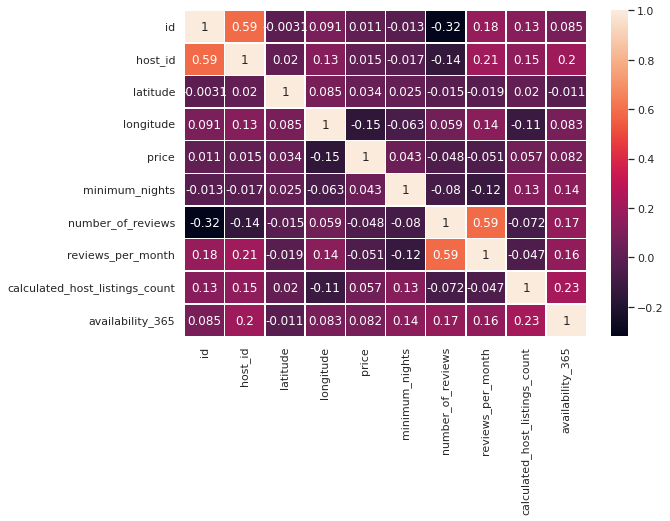

In [33]:
# To determine the correlation between the numeric values in the bnb_nyc dataframe 

sns.set_theme()
bnb_cor = bnb_nyc.corr()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(bnb_cor, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Availability')

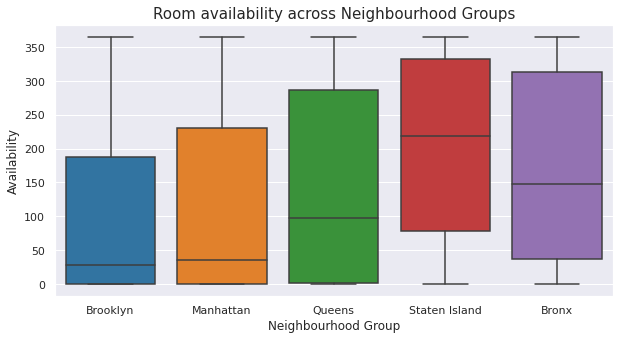

In [27]:
# Room availability across Neighbourhood Groups

plt.figure(figsize=(10,5))
sns.boxplot(data=bnb_nyc, x='neighbourhood_group',y='availability_365',palette='tab10')
plt.title("Room availability across Neighbourhood Groups",size=15)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Availability")

The above boxplot clearly shows that the Rooms in Manhattan and Brooklyn have the lowest availability rates while the Room availability acrossStaten Island is the Highest. It clrearly shows the trend tht the customers preferes rooms in Manhattan and Brooklyn followed by Queens with Bronx and Staten Island being the least preferable.

Text(0.5, 1.0, 'Neighbourhood Group wise Median of Availability')

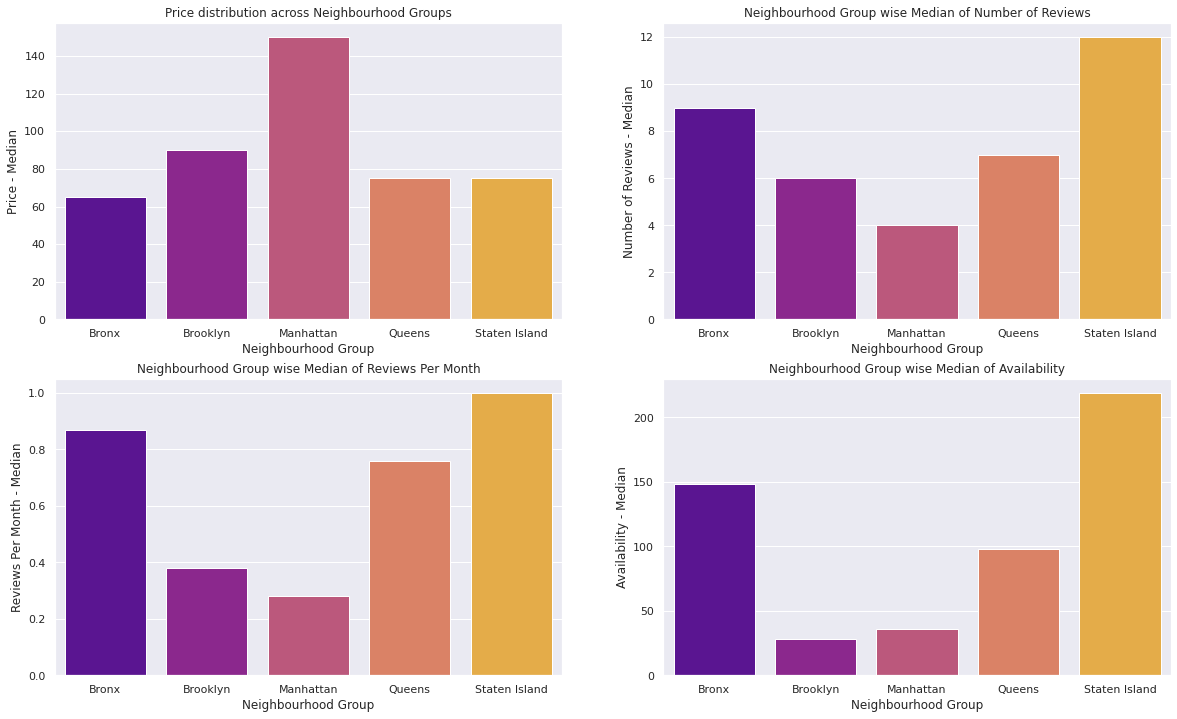

In [35]:
# To find out the various parameters for Neighbourhood Groups
neighbourhood_prices = bnb_nyc.groupby("neighbourhood_group")["price"].median().reset_index()
neighbourhood_reviews = bnb_nyc.groupby("neighbourhood_group")["number_of_reviews"].median().reset_index()
neighbourhood_reviews_pm= bnb_nyc.groupby("neighbourhood_group")["reviews_per_month"].median().reset_index()
neighbourhood_avail= bnb_nyc.groupby("neighbourhood_group")["availability_365"].median().reset_index()


plt.figure(figsize=(20, 12))

#Median price for Neighbourhood Groups
plt.subplot(221)
sns.barplot(data=neighbourhood_prices, x=neighbourhood_prices["neighbourhood_group"], y=neighbourhood_prices["price"], palette='plasma')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price - Median")
plt.title("Price distribution across Neighbourhood Groups")

#Median of  Number of Reviews per month for Neighbourhood Groups

plt.subplot(222)
sns.barplot(data=neighbourhood_reviews, x=neighbourhood_reviews["neighbourhood_group"], y=neighbourhood_reviews["number_of_reviews"], palette='plasma')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Reviews - Median")
plt.title("Neighbourhood Group wise Median of Number of Reviews")

#Median of Reviews per month for Neighbourhood Groups


plt.subplot(223)
sns.barplot(data=neighbourhood_reviews_pm, x=neighbourhood_reviews_pm["neighbourhood_group"], y=neighbourhood_reviews_pm["reviews_per_month"], palette='plasma')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Reviews Per Month - Median")
plt.title("Neighbourhood Group wise Median of Reviews Per Month")


#Median Availability for Neighbourhood Groups

plt.subplot(224)
sns.barplot(data=neighbourhood_avail, x=neighbourhood_avail["neighbourhood_group"], y=neighbourhood_avail["availability_365"], palette='plasma')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Availability - Median")
plt.title("Neighbourhood Group wise Median of Availability")




Text(0.5, 1.0, 'Neighbourhood Group wise Median of Minimum Nights')

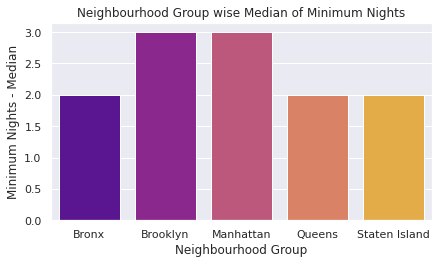

In [36]:
#Median of Minimum Nights for Neighbourhood Groups

neighbourhood_mn= bnb_nyc.groupby("neighbourhood_group")["minimum_nights"].median().reset_index()
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(data=neighbourhood_mn, x=neighbourhood_mn["neighbourhood_group"], y=neighbourhood_mn["minimum_nights"], palette='plasma')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Minimum Nights - Median")
plt.title("Neighbourhood Group wise Median of Minimum Nights")


Text(0.5, 1.0, 'Availability wise Price')

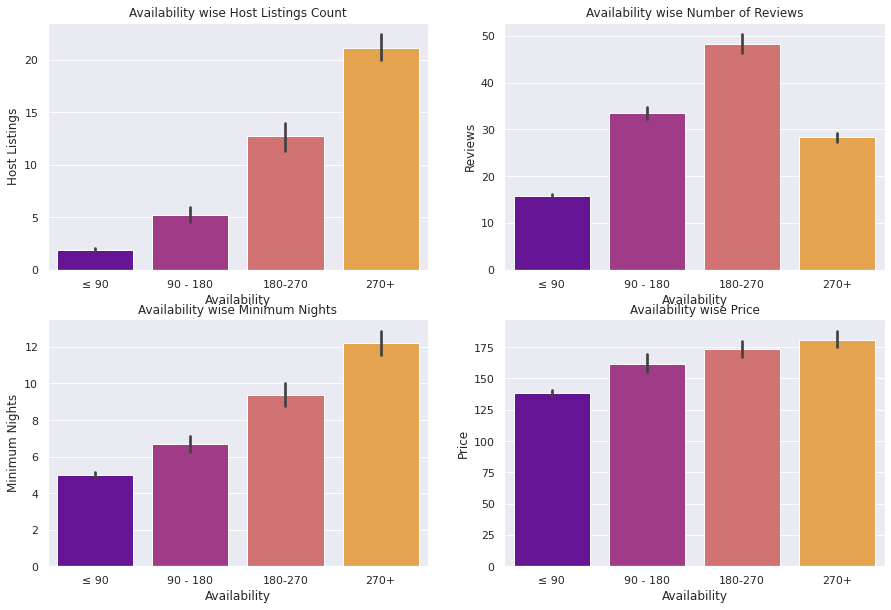

In [38]:
# To visualize various parameter distribution for Availability

plt.figure(figsize=(15,12))

# To visualsize Availability wise Host Listings Count
plt.subplot(221)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Availability"], y=bnb_nyc["calculated_host_listings_count"], palette='plasma')
plt.xlabel("Availability")
plt.ylabel("Host Listings")
plt.title("Availability wise Host Listings Count")

# To visualsize Availability wise distribution of Number of Reviews
plt.subplot(222)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Availability"], y=bnb_nyc["number_of_reviews"], palette='plasma')
plt.xlabel("Availability")
plt.ylabel("Reviews")
plt.title("Availability wise Number of Reviews")

# To visualsize Availability wise Minimum Nights distribution
plt.subplot(223)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Availability"], y=bnb_nyc["minimum_nights"], palette='plasma')
plt.xlabel("Availability")
plt.ylabel("Minimum Nights")
plt.title("Availability wise Minimum Nights")

# To visualsize Availability wise Price distribution
plt.subplot(224)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Availability"], y=bnb_nyc["price"], palette='plasma')
plt.xlabel("Availability")
plt.ylabel("Price")
plt.title("Availability wise Price")

Text(0.5, 1.0, 'Price Range wise Minimum Nights')

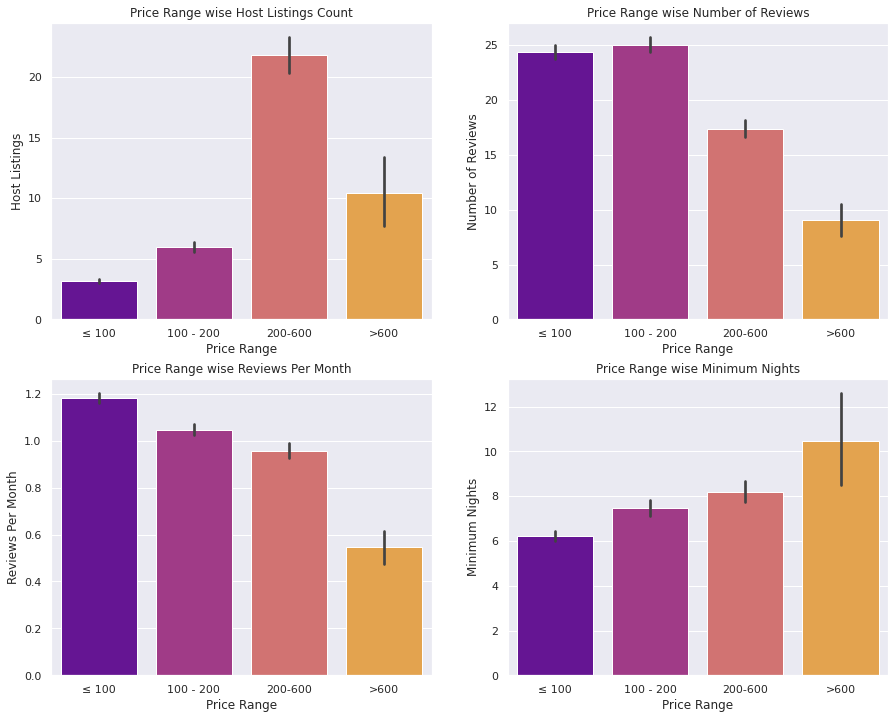

In [40]:
# To visualize various parameter distribution against Price

plt.figure(figsize=(15,12))

# To visualize Price Range wise Host Listings Count distribution
plt.subplot(221)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Price Range"], y=bnb_nyc["calculated_host_listings_count"], palette='plasma')
plt.xlabel("Price Range")
plt.ylabel("Host Listings")
plt.title("Price Range wise Host Listings Count")

# To visualize Price Range wise distribution of Number of Reviews
plt.subplot(222)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Price Range"], y=bnb_nyc["number_of_reviews"], palette='plasma')
plt.xlabel("Price Range")
plt.ylabel("Number of Reviews")
plt.title("Price Range wise Number of Reviews")

# To visualize Price Range wise Reviews Per Month distribution
plt.subplot(223)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Price Range"], y=bnb_nyc["reviews_per_month"], palette='plasma')
plt.xlabel("Price Range")
plt.ylabel("Reviews Per Month")
plt.title("Price Range wise Reviews Per Month")

# To visualize Price Range wise distribution of Minimum Nights
plt.subplot(224)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Price Range"], y=bnb_nyc["minimum_nights"], palette='plasma')
plt.xlabel("Price Range")
plt.ylabel("Minimum Nights")
plt.title("Price Range wise Minimum Nights")

Text(0.5, 1.0, 'Host Listings wise Number of Reviews')

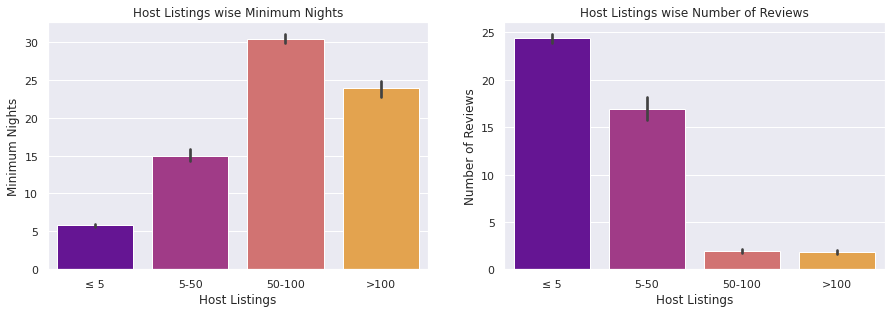

In [41]:
# To visualize various parameter distribution against Host Listings
plt.figure(figsize=(15,10))

# To visualize Host Listings wise distribution of Minimum Nights
plt.subplot(221)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Host Listings"], y=bnb_nyc["minimum_nights"], palette='plasma')
plt.xlabel("Host Listings")
plt.ylabel("Minimum Nights")
plt.title("Host Listings wise Minimum Nights")

# To visualize Host Listings wise distribution of Number of Reviews
plt.subplot(222)
sns.barplot(data=bnb_nyc, x=bnb_nyc["Host Listings"], y=bnb_nyc["number_of_reviews"], palette='plasma')
plt.xlabel("Host Listings")
plt.ylabel("Number of Reviews")
plt.title("Host Listings wise Number of Reviews")


In [42]:
bnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


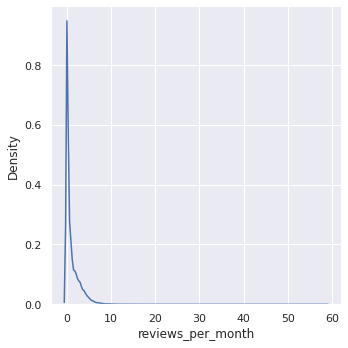

In [53]:
# plot the density distribution of reviews_per_month
sns.displot(bnb_nyc, x="reviews_per_month", kind="kde")


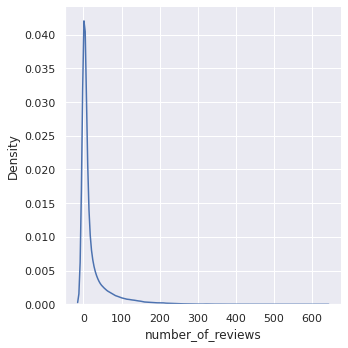

In [50]:
# plot the density distribution of number_of_reviews
sns.displot(bnb_nyc, x="number_of_reviews", kind="kde")

<Figure size 1800x576 with 0 Axes>

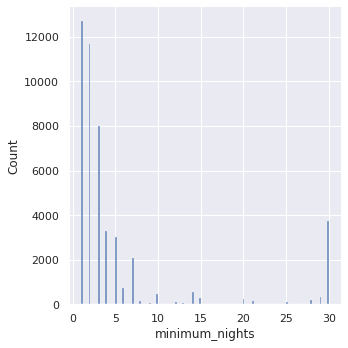

In [54]:
# the distribution plot for the minimum nights stay 
plt.figure(figsize=(25,8))
sns.displot(bnb_nyc, x = bnb_nyc[(bnb_nyc['minimum_nights'] <= 30)]['minimum_nights'])

We can see that the largest proportion of required minimum stays is 1-3 nights. The minimum night stays are skewed to the left, with 1 - 7 nights representing the minimum stays for a majority of all listings.

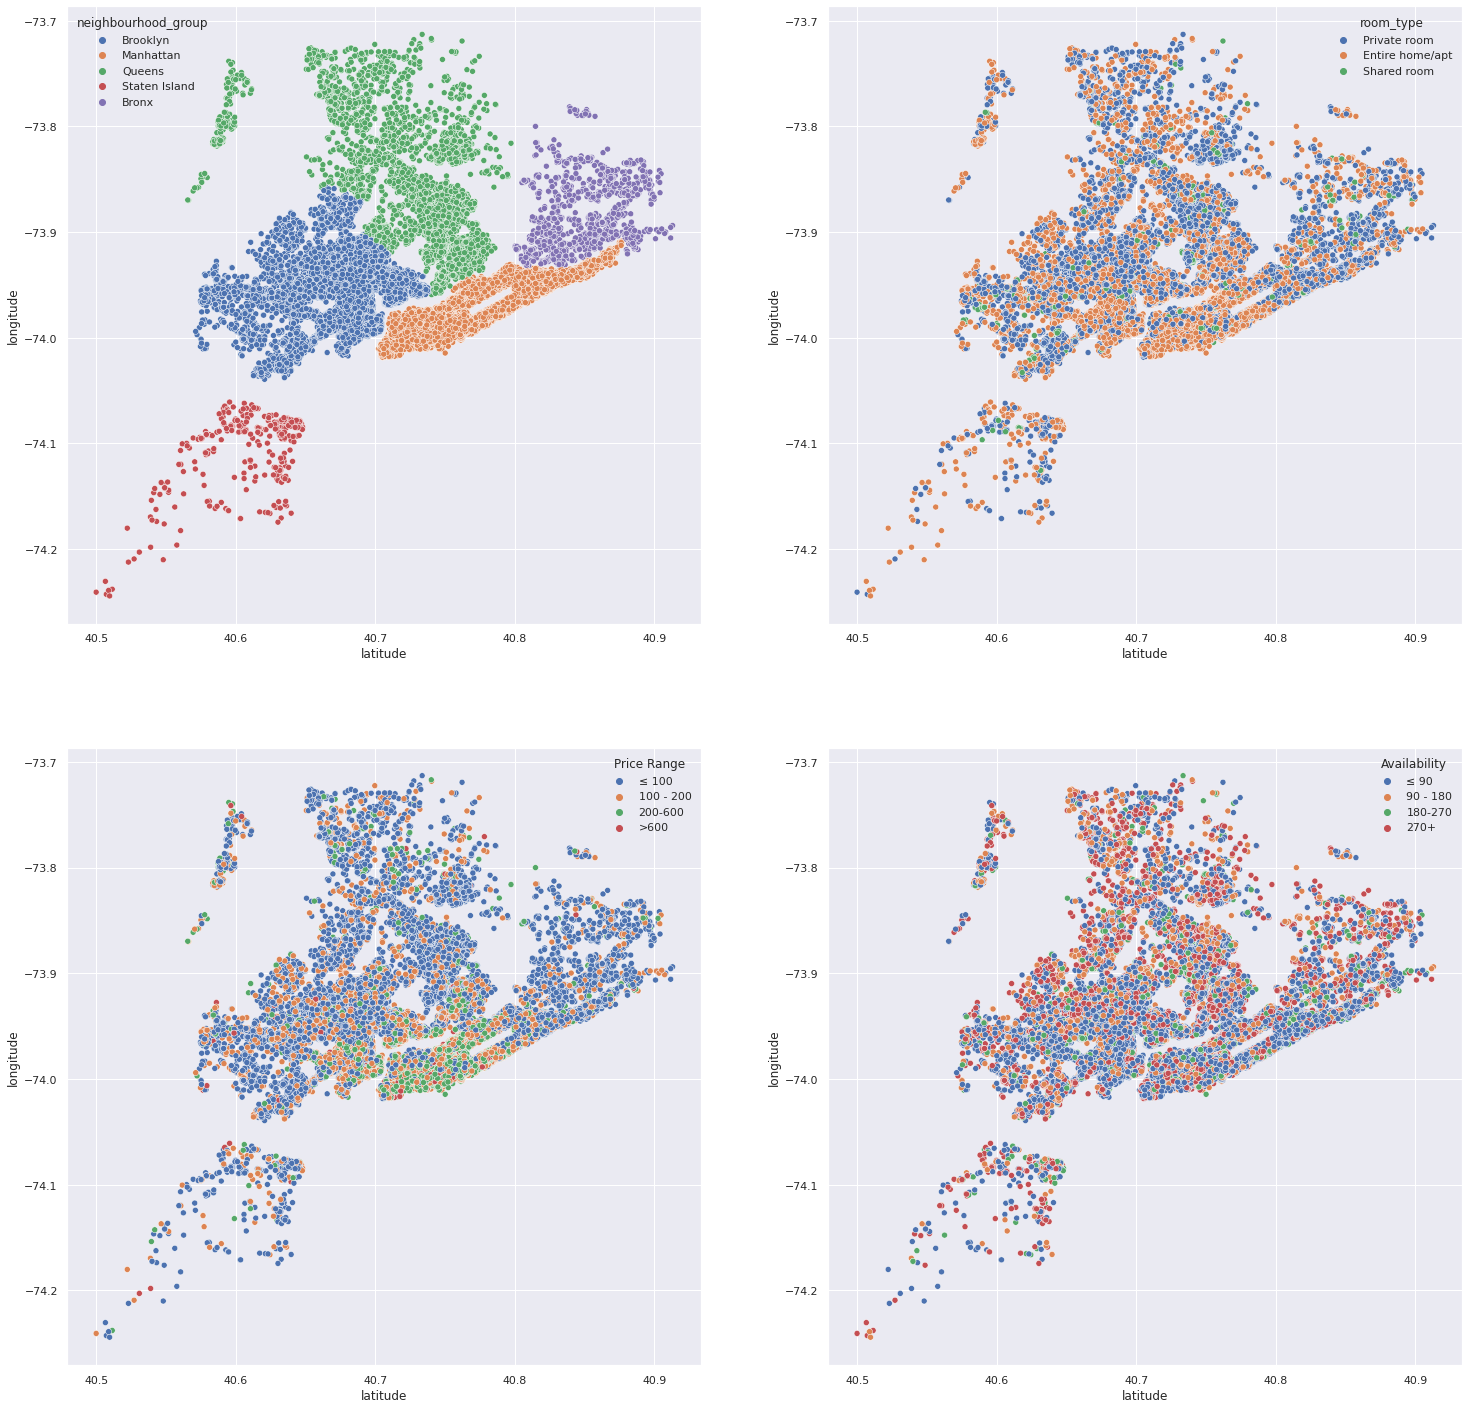

In [55]:
# plot the distribution of neighbourhoods, room_type,  price level and availability
plt.figure(figsize = (25, 25))
# create 2x2 subplots showing the distribution of neighbourhoods, room_type,  price level and availability
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=bnb_nyc)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=bnb_nyc)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="Price Range", data=bnb_nyc)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="Availability", data=bnb_nyc)

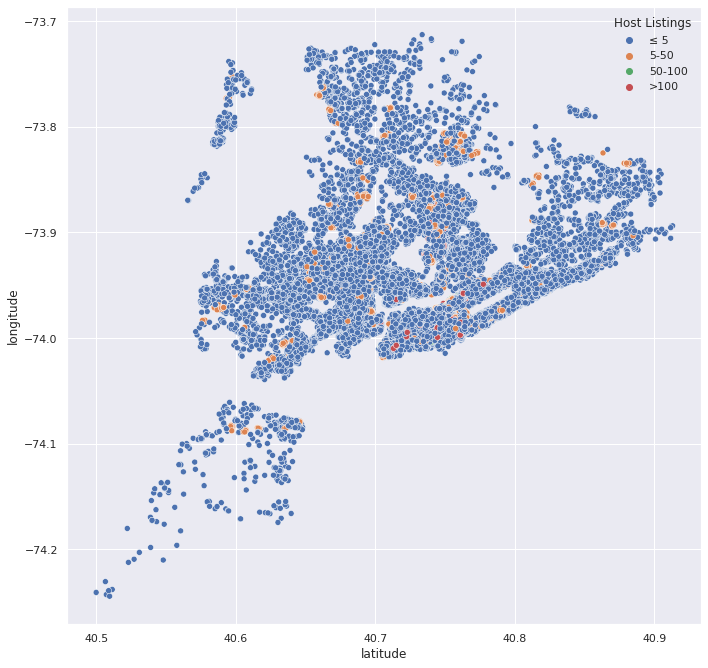

In [56]:
plt.figure(figsize = (25, 25))
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="Host Listings", data=bnb_nyc)

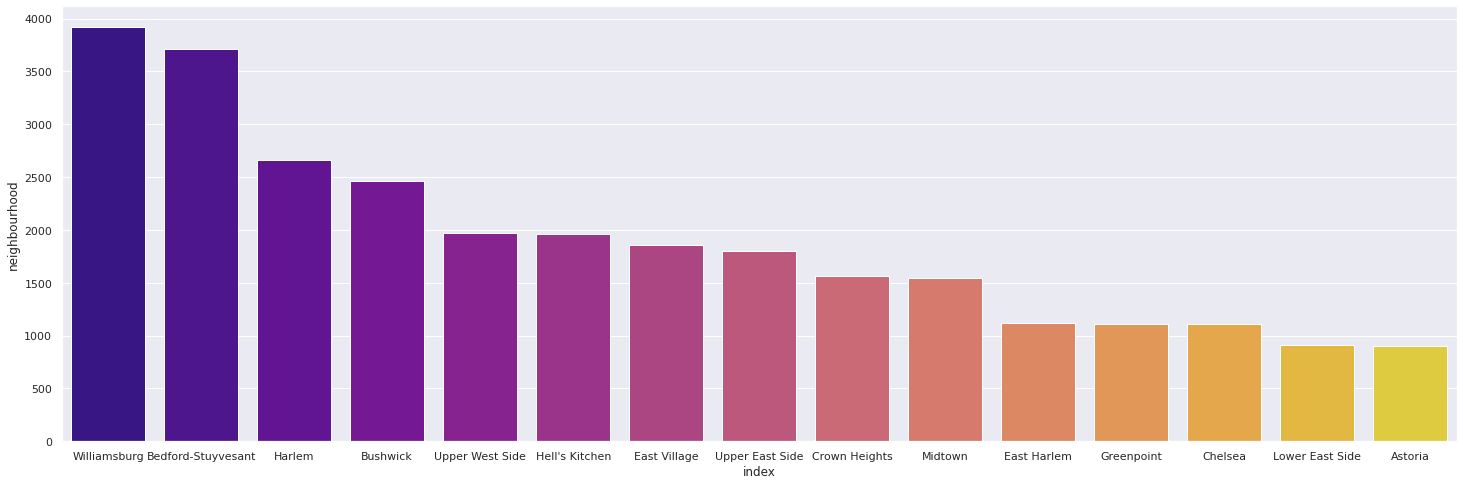

In [58]:
# Find out the top 15 neighbourhoods with the most number of listings

top_15_neighbourhoods = bnb_nyc["neighbourhood"].value_counts().sort_values(ascending = False).reset_index().head(15)
top_15_neighbourhoods
plt.figure(figsize = (25, 8))
sns.barplot(data=top_15_neighbourhoods, x=top_15_neighbourhoods["index"], y=top_15_neighbourhoods["neighbourhood"], palette='plasma');

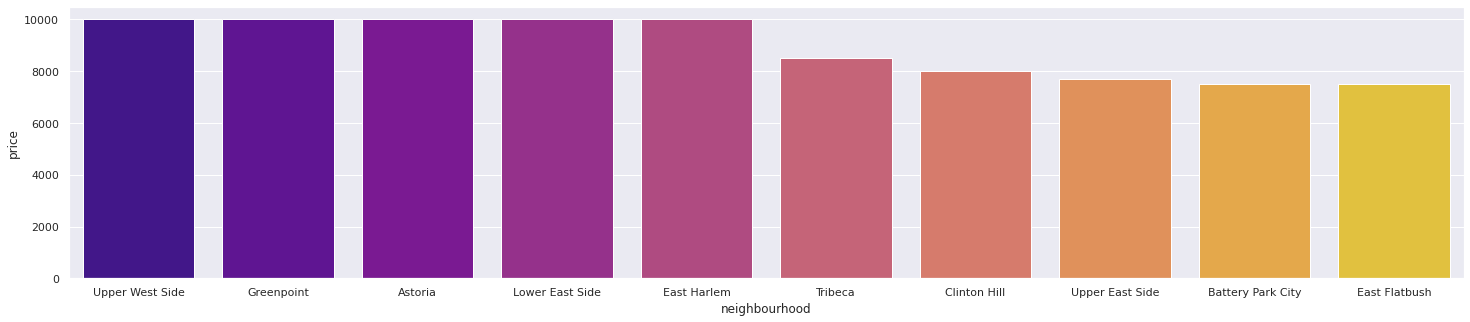

In [59]:
# To see the costliest listings(top 10 costliest listings, arranged by neighbourhood)
costliest_neighbourhoods = bnb_nyc.groupby("neighbourhood")["price"].max().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (25, 5))
sns.barplot(data=costliest_neighbourhoods, x=costliest_neighbourhoods["neighbourhood"], y=costliest_neighbourhoods["price"], palette='plasma');

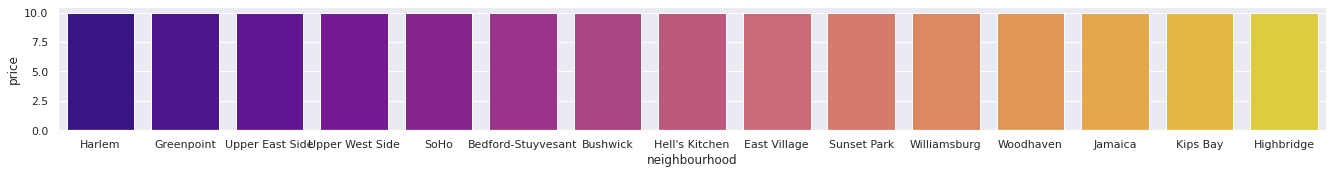

In [63]:
# To see the cheapest listings(top 10 cheapest listings, arranged by neighbourhood)
cheapest_neighbourhoods = bnb_nyc.groupby("neighbourhood")["price"].min().sort_values().reset_index().head(15)
plt.figure(figsize = (50, 5))
plt.subplot(221)
sns.barplot(data=cheapest_neighbourhoods, x=cheapest_neighbourhoods["neighbourhood"], y=cheapest_neighbourhoods["price"], palette='plasma');


In [ ]:

# Q1P = bnb_nyc["price"].quantile(0.25)
# Q3P = bnb_nyc["price"].quantile(0.75)
# IQRP = Q3P - Q1P

# high_priced_bnb = bnb_nyc[bnb_nyc["price"] > (Q3P + 1.5 * IQRP)]
# high_priced_bnb_plot = high_priced_bnb.groupby("neighbourhood")["price"].max().sort_values(ascending = False).reset_index().head(15)

# plt.figure(figsize = (25, 5))
# sns.barplot(data=high_priced_bnb_plot, x=high_priced_bnb_plot["neighbourhood"], y=high_priced_bnb_plot["price"], palette='plasma');


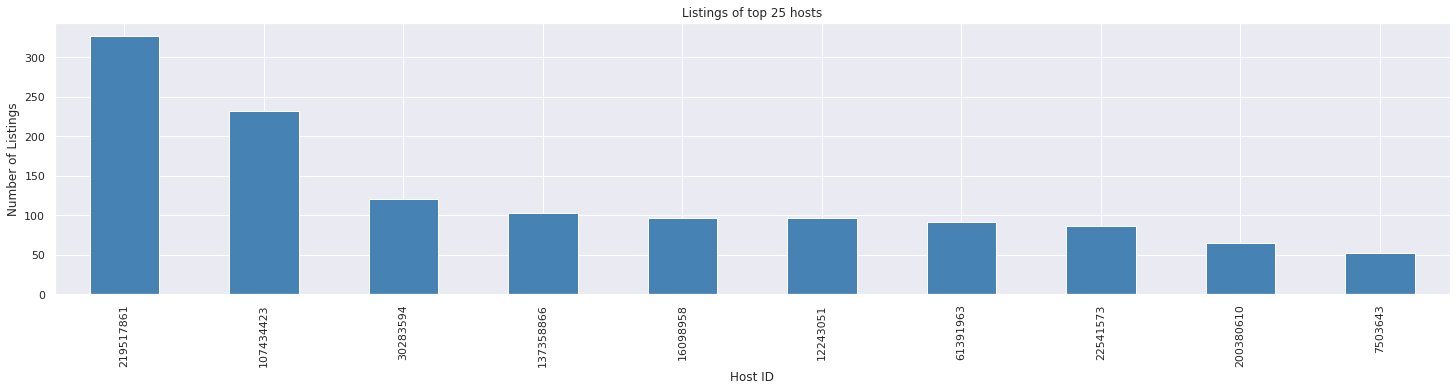

In [64]:
# Top 10 hosts with the most number of listings

top_10_hosts= bnb_nyc.groupby(["host_id"])["id"].count().sort_values(ascending = False).reset_index().head(10)
top_10_hosts_by_listings = pd.merge(bnb_nyc,top_10_hosts, on='host_id', how='inner')

# Bar plot of count of AirBnB listings of top 25 hosts(by number of listings) distributed across the Neighbourhood 

counts = top_10_hosts_by_listings["host_id"].value_counts().sort_values(ascending = False)

fig = plt.figure(figsize=(25, 5))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Listings of top 25 hosts")
ax.set_xlabel("Host ID") 
ax.set_ylabel("Number of Listings")
plt.show()



In [65]:
top_10_hosts_by_listings.describe(include=['object','category'])

,neighbourhood_group,neighbourhood,room_type,last_review,Price Range,Minimum Nights,Availability,Host Listings
count,1270,1270,1270,1270,1270,1270,1270,1270
unique,3,35,2,268,4,4,4,2
top,Manhattan,Financial District,Entire home/apt,NaN,200-600,5-50,270+,>100
freq,1130,318,1160,683,720,1066,860,783


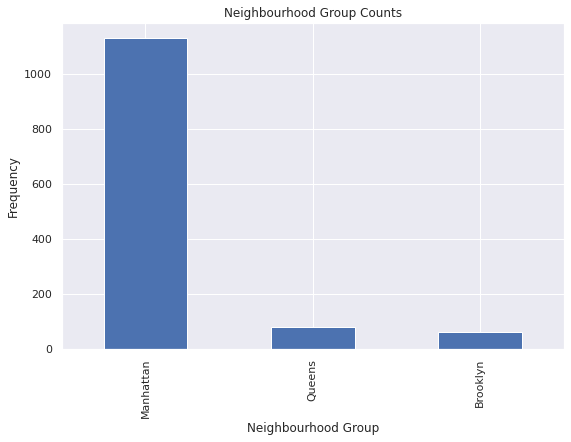

In [66]:
top_10_hosts_by_listings["neighbourhood_group"].value_counts().sort_values(ascending = False)

# Bar plot of count of AirBnB listings of top 10 hosts(by number of listings) distributed across the Neighbourhood Group 

counts = top_10_hosts_by_listings["neighbourhood_group"].value_counts().sort_values(ascending = False)
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax)
ax.set_title("Neighbourhood Group" + " Counts")
ax.set_xlabel("Neighbourhood Group") 
ax.set_ylabel("Frequency")
plt.show()

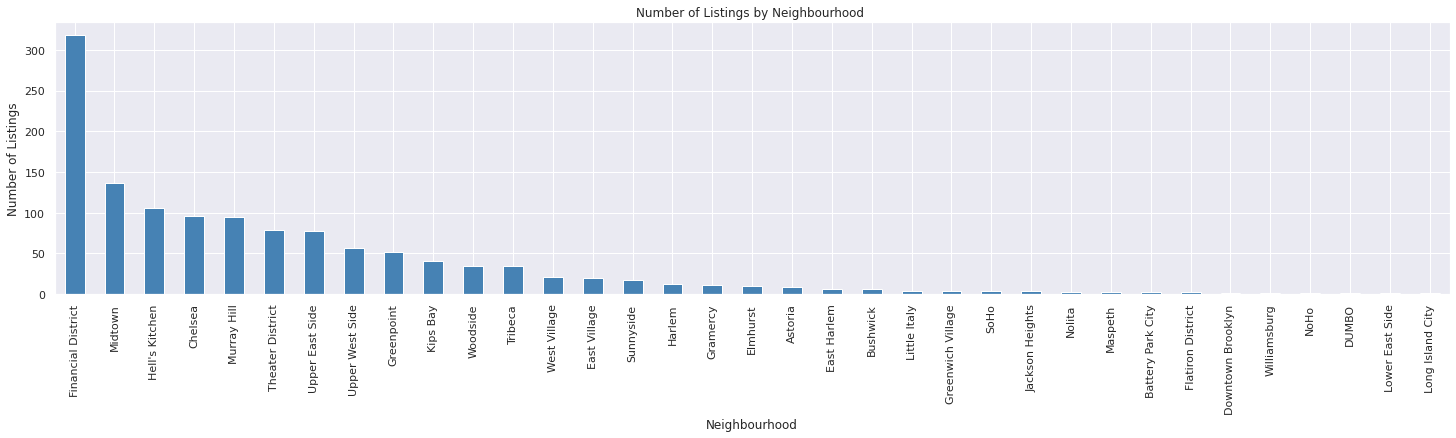

In [67]:
# Bar plot of count of AirBnB listings of top 10 hosts (by number of listings) distributed across the Neighbourhood

counts = top_10_hosts_by_listings["neighbourhood"].value_counts().sort_values(ascending = False)
fig = plt.figure(figsize=(25, 5))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Number of Listings by Neighbourhood ")
ax.set_xlabel("Neighbourhood") 
ax.set_ylabel("Number of Listings")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'Count of Listings of Busiest Hosts')

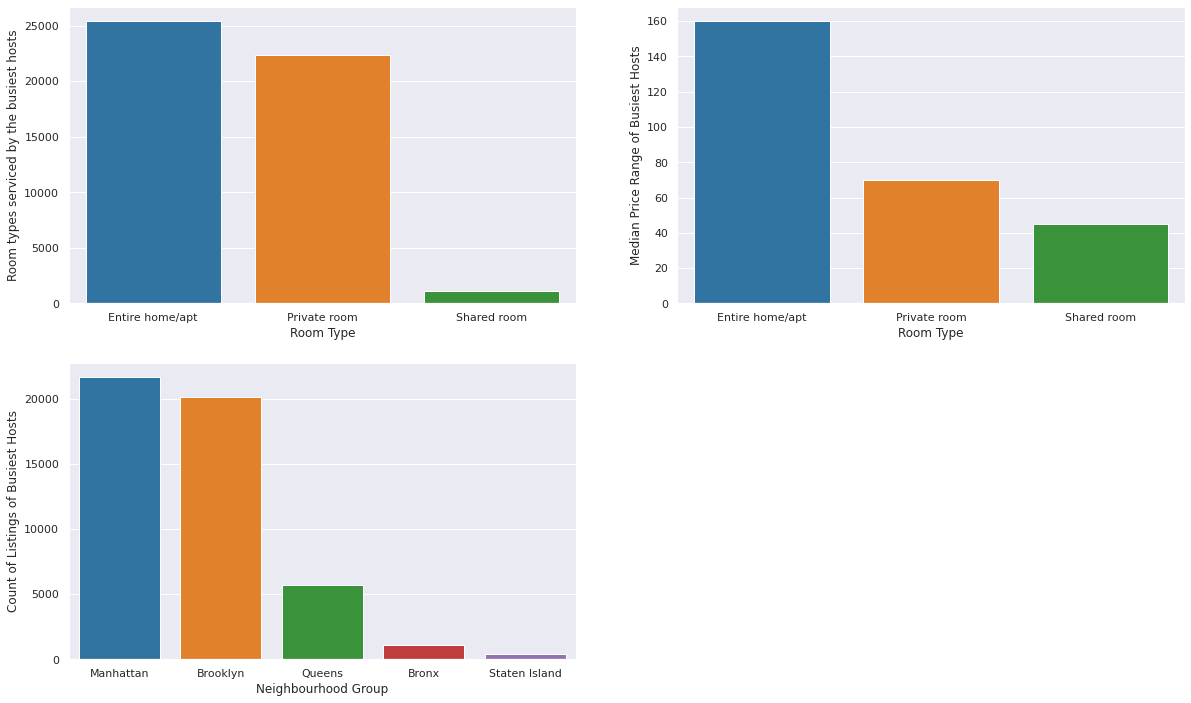

In [70]:
#To find out the busiest hosts


busiest_bnb = bnb_nyc[bnb_nyc["availability_365"] <= 7]
busiest_bnb_rooms = bnb_nyc["room_type"].value_counts().reset_index()
busiest_bnb_price = bnb_nyc.groupby("room_type")["price"].median().reset_index()
busiest_bnb_neighbourhood_group = bnb_nyc["neighbourhood_group"].value_counts().reset_index()
plt.figure(figsize=(20,12))

# To find the room types serviced by the busiest hosts
plt.subplot(221)
sns.barplot(data=busiest_bnb_rooms, x=busiest_bnb_rooms["index"], y=busiest_bnb_rooms["room_type"], palette='tab10');
plt.xlabel("Room Type")
plt.ylabel("Room types serviced by the busiest hosts")

# To find the median price range of the rooms listed by the busiest hosts.
plt.subplot(222)
sns.barplot(data=busiest_bnb_price, x=busiest_bnb_price["room_type"], y=busiest_bnb_price["price"], palette='tab10');
plt.xlabel("Room Type")
plt.ylabel("Median Price Range of Busiest Hosts")

# To find the busiest neighbourhood group in which the hosts are the busiest.
plt.subplot(223)
sns.barplot(data=busiest_bnb_neighbourhood_group, x=busiest_bnb_neighbourhood_group["index"], y=busiest_bnb_neighbourhood_group["neighbourhood_group"], palette='tab10');
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of Listings of Busiest Hosts")

# To find the busiest neighbourhood group in which the hosts are the busiest.
plt.subplot(223)
sns.barplot(data=busiest_bnb_neighbourhood_group, x=busiest_bnb_neighbourhood_group["index"], y=busiest_bnb_neighbourhood_group["neighbourhood_group"], palette='tab10');
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of Listings of Busiest Hosts")


In [72]:
bnb_nyc.groupby(["neighbourhood_group","room_type"])["price"].median().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,54.0,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


In [73]:
bnb_nyc.groupby(["host_id","neighbourhood_group"])["neighbourhood_group"].count().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
host_id,,,,,
2438,NaN,1.0,NaN,NaN,NaN
2571,NaN,1.0,NaN,NaN,NaN
2787,NaN,6.0,NaN,NaN,NaN
2845,NaN,NaN,2.0,NaN,NaN
2868,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...
274273284,NaN,NaN,1.0,NaN,NaN
274298453,NaN,1.0,NaN,NaN,NaN
274307600,NaN,1.0,NaN,NaN,NaN
